In [1]:
# Common imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

path = os.getcwd()
sys.path.append(path)

# Local imports
from lfmm import lfmm_ridge

%load_ext autoreload
%autoreload 2

In [66]:
c = np.load("../data/pheno.npy")
x = np.load("../data/x_genomic.npy")
reconstructed_cvae = np.load("../data/reconstructed_cvae.npy")
c_future = np.load("../data/c_future.npy")
fitness_future = np.load("../data/fitness_future.npy")
fitness = np.load("../data/fitness.npy")


In [5]:
lfmm = lfmm_ridge(Y=x, X=c, K=6)

In [73]:
reconstructed_samples = np.dot(c, lfmm.B.T) + np.dot(lfmm.U, lfmm.V.T)
reconstructed_samples = np.asarray(reconstructed_samples > 0, dtype=int)

In [77]:
np.mean(reconstructed_samples)

0.019907708716361466

In [59]:
reconstructed_cvae = np.asarray(reconstructed_cvae > 0.5, dtype=int)

In [60]:
dist_lfmm = np.linalg.norm((reconstructed_samples - x)) / len(reconstructed_samples)
dist_cvae = np.linalg.norm((reconstructed_cvae - x)) / len(reconstructed_cvae)
print(f"Distance from the original data with lfmm: {dist_lfmm}")
print(f"Distance from the original data with cvae: {dist_cvae}")

Distance from the original data with lfmm: 0.7185718582682974
Distance from the original data with cvae: 0.2865415830100244


In [63]:
generated_data = np.dot(c_future, lfmm.B.T) + np.dot(lfmm.U, lfmm.V.T)
generated_data = np.asarray(generated_data > 0, dtype=int)

In [65]:
genomic_offset = np.linalg.norm((reconstructed_samples - generated_data), axis=1) # change to  

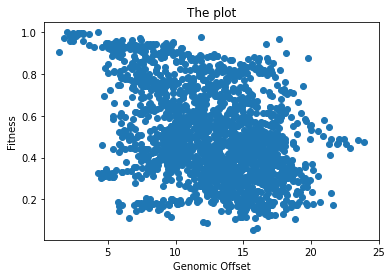

In [67]:
plt.figure()
plt.title("The plot")
plt.scatter(genomic_offset, fitness_future)
plt.xlabel("Genomic Offset")
plt.ylabel("Fitness")
plt.show()